# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

# Ingest Data  

In [2]:
df = pd.read_excel("World military power.xlsx")

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

## Convert multi index columns to one level

In [4]:
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
135,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
137,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [5]:
df.columns = df.loc[0]

In [6]:
df.drop(0,inplace=True)

In [7]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
135,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
137,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [8]:
#df.set_index(df["Military Strength"],inplace=True)

## Detect and drop duplicated columns

In [9]:
df = df.drop_duplicates()
df

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800.0,Venezuela,7100.0,Venezuela,5267.0
135,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444.0,Vietnam,17702.0,Vietnam,4616.0
136,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
137,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250.0,Zambia,6043.0


In [10]:
df["Military Strength"].value_counts()

Afghanistan        1
Peru               1
North Macedonia    1
Norway             1
Oman               1
                  ..
France             1
Finland            1
Ethiopia           1
Estonia            1
Zimbabwe           1
Name: Military Strength, Length: 138, dtype: int64

## Check for missing values 

In [11]:
null_data = df[df.isnull().any(axis=1)]

In [12]:
null_data # buraya kdr geldik

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
7,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,...,Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.0,Australia,2000.0,NaN,NaN
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
10,Bahrain,1.8547,Bahrain,109.0,Bahrain,17.0,Bahrain,0.0,Bahrain,2.0,...,Bahrain,"14,22,659",Bahrain,760.0,Bahrain,161.0,Bahrain,0.0,NaN,NaN
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
15,Bolivia,0.9942,Bolivia,69.0,Bolivia,0.0,Bolivia,0.0,Bolivia,14.0,...,Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000.0,Bolivia,7252.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0


In [13]:
a = []
for i in df.columns:
    if df[i].isnull().any() == True:
        a.append(i)

In [14]:
a

['Navy Fleet Strengths',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage',
 'Total Coastline Coverage value',
 'Total Border Coverage',
 'Total Border Coverage value']

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [15]:
df[df["Aircraft Carrier Fleet Strength value"].isnull()]

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0
39,Ethiopia,0.8581,Ethiopia,86.0,Ethiopia,24.0,Ethiopia,0.0,Ethiopia,9.0,...,Ethiopia,"10,83,86,391",Ethiopia,"11,04,300",NaN,NaN,Ethiopia,"1,04,300",Ethiopia,5925.0


In [16]:
df["Aircraft Carrier Fleet Strength value"].fillna(value=0,inplace= True)

In [17]:
df[df["Total Coastline Coverage value"].isnull()]

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
15,Bolivia,0.9942,Bolivia,69.0,Bolivia,0.0,Bolivia,0.0,Bolivia,14.0,...,Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000.0,Bolivia,7252.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0


In [18]:
df[df["Total Border Coverage value"].isnull()]

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
7,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,...,Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.0,Australia,2000.0,NaN,NaN
10,Bahrain,1.8547,Bahrain,109.0,Bahrain,17.0,Bahrain,0.0,Bahrain,2.0,...,Bahrain,"14,22,659",Bahrain,760.0,Bahrain,161.0,Bahrain,0.0,NaN,NaN
58,Japan,0.1501,Japan,1561.0,Japan,279.0,Japan,12.0,Japan,60.0,...,Japan,"12,61,68,156",Japan,"3,77,915",Japan,29751.0,Japan,1770.0,NaN,NaN
70,Madagascar,3.0869,Madagascar,6.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,...,Madagascar,"2,56,83,610",Madagascar,"5,87,040",Madagascar,4828.0,Madagascar,600.0,NaN,NaN
84,New Zealand,1.3684,New Zealand,48.0,New Zealand,0.0,New Zealand,0.0,New Zealand,7.0,...,New Zealand,"45,45,627",New Zealand,"2,67,710",New Zealand,15134.0,New Zealand,0.0,NaN,NaN
96,Philippines,0.7852,Philippines,171.0,Philippines,0.0,Philippines,19.0,Philippines,23.0,...,Philippines,"10,58,93,381",Philippines,"3,00,000",Philippines,36289.0,Philippines,3219.0,NaN,NaN
106,Singapore,0.7966,Singapore,235.0,Singapore,100.0,Singapore,0.0,Singapore,9.0,...,Singapore,"59,95,991",Singapore,697.0,Singapore,193.0,Singapore,10.0,NaN,NaN
114,Sri Lanka,1.4661,Sri Lanka,77.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,15.0,...,Sri Lanka,"2,25,76,592",Sri Lanka,65610.0,Sri Lanka,1340.0,Sri Lanka,160.0,NaN,NaN
120,Taiwan,0.4008,Taiwan,744.0,Taiwan,289.0,Taiwan,0.0,Taiwan,19.0,...,Taiwan,"2,35,45,963",Taiwan,35980.0,Taiwan,1566.0,Taiwan,3720.0,NaN,NaN


In [19]:
df[df["Total Border Coverage value"].isnull()]
# it seen that all of the contruies with null  border coverage values are island contriues
#we will fill the nulls with 0

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
7,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,...,Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.0,Australia,2000.0,NaN,NaN
10,Bahrain,1.8547,Bahrain,109.0,Bahrain,17.0,Bahrain,0.0,Bahrain,2.0,...,Bahrain,"14,22,659",Bahrain,760.0,Bahrain,161.0,Bahrain,0.0,NaN,NaN
58,Japan,0.1501,Japan,1561.0,Japan,279.0,Japan,12.0,Japan,60.0,...,Japan,"12,61,68,156",Japan,"3,77,915",Japan,29751.0,Japan,1770.0,NaN,NaN
70,Madagascar,3.0869,Madagascar,6.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,...,Madagascar,"2,56,83,610",Madagascar,"5,87,040",Madagascar,4828.0,Madagascar,600.0,NaN,NaN
84,New Zealand,1.3684,New Zealand,48.0,New Zealand,0.0,New Zealand,0.0,New Zealand,7.0,...,New Zealand,"45,45,627",New Zealand,"2,67,710",New Zealand,15134.0,New Zealand,0.0,NaN,NaN
96,Philippines,0.7852,Philippines,171.0,Philippines,0.0,Philippines,19.0,Philippines,23.0,...,Philippines,"10,58,93,381",Philippines,"3,00,000",Philippines,36289.0,Philippines,3219.0,NaN,NaN
106,Singapore,0.7966,Singapore,235.0,Singapore,100.0,Singapore,0.0,Singapore,9.0,...,Singapore,"59,95,991",Singapore,697.0,Singapore,193.0,Singapore,10.0,NaN,NaN
114,Sri Lanka,1.4661,Sri Lanka,77.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,15.0,...,Sri Lanka,"2,25,76,592",Sri Lanka,65610.0,Sri Lanka,1340.0,Sri Lanka,160.0,NaN,NaN
120,Taiwan,0.4008,Taiwan,744.0,Taiwan,289.0,Taiwan,0.0,Taiwan,19.0,...,Taiwan,"2,35,45,963",Taiwan,35980.0,Taiwan,1566.0,Taiwan,3720.0,NaN,NaN


In [20]:
df["Total Border Coverage value"].fillna(value=0,inplace= True)
#only filling the Total Border Coverage value is enough

In [21]:
df[df["Navy Fleet Strengths value"].isnull()]
#it is seen that these countries dont have any sea borders, thus be filled with 0

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0
39,Ethiopia,0.8581,Ethiopia,86.0,Ethiopia,24.0,Ethiopia,0.0,Ethiopia,9.0,...,Ethiopia,"10,83,86,391",Ethiopia,"11,04,300",NaN,NaN,Ethiopia,"1,04,300",Ethiopia,5925.0
49,Hungary,0.8215,Hungary,47.0,Hungary,12.0,Hungary,0.0,Hungary,5.0,...,Hungary,"98,25,704",Hungary,"1,03,000",NaN,NaN,Hungary,1622.0,Hungary,2106.0
63,Kyrgyzstan,1.9244,Kyrgyzstan,5.0,Kyrgyzstan,0.0,Kyrgyzstan,0.0,Kyrgyzstan,0.0,...,Kyrgyzstan,"58,49,296",Kyrgyzstan,"1,99,951",NaN,NaN,Kyrgyzstan,600.0,Kyrgyzstan,4573.0
72,Mali,1.8941,Mali,29.0,Mali,9.0,Mali,0.0,Mali,6.0,...,Mali,"1,84,29,893",Mali,"12,40,192",NaN,NaN,Mali,0.0,Mali,7908.0
75,Moldova,2.1291,Moldova,3.0,Moldova,0.0,Moldova,0.0,Moldova,1.0,...,Moldova,"34,37,720",Moldova,33851.0,NaN,NaN,Moldova,558.0,Moldova,1885.0


In [22]:
df["Navy Fleet Strengths value"].fillna(value=0,inplace= True)

In [23]:
df[df["Attack Aircraft Strength"]== "Czechia"]["Navy Fleet Strengths value"]

31    0.0
Name: Navy Fleet Strengths value, dtype: float64

In [24]:
df[df["Submarine Fleet Strength value"].isnull()]["Navy Fleet Strengths value"].value_counts()

0.0      22
234.0     1
Name: Navy Fleet Strengths value, dtype: int64

In [25]:
df[df["Submarine Fleet Strength value"].isnull() & df["Navy Fleet Strengths value"] > 0 ]

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
111,South Korea,0.1509,South Korea,1649.0,South Korea,414.0,South Korea,71.0,South Korea,41.0,...,South Korea,"5,14,18,097",South Korea,99720.0,South Korea,2413.0,South Korea,1600.0,South Korea,237.0


In [26]:
df[df["Military Strength"] == "South Korea"]["Submarine Fleet Strength value"] = 22
# this data was taken from
#https://www.globalfirepower.com/navy-submarines.php

In [27]:
df["Submarine Fleet Strength value"].fillna(value=0,inplace= True)

In [28]:
df[df["Destroyer Fleet Strength value"].isnull()]
#checked all the countries from globalfirepower.com
#only south kore has destroyer fleets

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0
39,Ethiopia,0.8581,Ethiopia,86.0,Ethiopia,24.0,Ethiopia,0.0,Ethiopia,9.0,...,Ethiopia,"10,83,86,391",Ethiopia,"11,04,300",NaN,NaN,Ethiopia,"1,04,300",Ethiopia,5925.0


In [29]:
df[df["Military Strength"] == "South Korea"]["Destroyer Fleet Strength value"] = 12

In [30]:
df["Destroyer Fleet Strength value"].fillna(value=0,inplace= True)

In [31]:
df[df["Frigate Fleet Strength value"].isnull()]
#same with other columns south korea is only expection

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0
39,Ethiopia,0.8581,Ethiopia,86.0,Ethiopia,24.0,Ethiopia,0.0,Ethiopia,9.0,...,Ethiopia,"10,83,86,391",Ethiopia,"11,04,300",NaN,NaN,Ethiopia,"1,04,300",Ethiopia,5925.0


In [32]:
df[df["Military Strength"] == "South Korea"]["Frigate Fleet Strength value"] = 18

In [33]:
df["Frigate Fleet Strength value"].fillna(value=0,inplace= True)

In [34]:
df[df["Total Coastline Coverage value"].isnull()]


,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,...,Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,...,Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,...,Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
14,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,...,Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
15,Bolivia,0.9942,Bolivia,69.0,Bolivia,0.0,Bolivia,0.0,Bolivia,14.0,...,Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000.0,Bolivia,7252.0
17,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,...,Botswana,"22,49,104",Botswana,"5,81,730",NaN,NaN,Botswana,0.0,Botswana,4347.0
20,Burkina Faso,1.9009,Burkina Faso,16.0,Burkina Faso,0.0,Burkina Faso,3.0,Burkina Faso,1.0,...,Burkina Faso,"1,97,42,715",Burkina Faso,"2,74,200",NaN,NaN,Burkina Faso,0.0,Burkina Faso,3611.0
24,Central African Republic,3.2889,Central African Republic,3.0,Central African Republic,0.0,Central African Republic,0.0,Central African Republic,2.0,...,Central African Republic,"57,45,062",Central African Republic,"6,22,984",NaN,NaN,Central African Republic,2800.0,Central African Republic,5920.0
25,Chad,1.6383,Chad,35.0,Chad,0.0,Chad,6.0,Chad,6.0,...,Chad,"1,58,33,116",Chad,"12,84,000",NaN,NaN,Chad,0.0,Chad,6406.0
31,Czechia,0.5531,Czechia,95.0,Czechia,12.0,Czechia,16.0,Czechia,8.0,...,Czechia,"1,06,86,269",Czechia,78867.0,NaN,NaN,Czechia,664.0,Czechia,2046.0


In [35]:
df["Total Coastline Coverage value"].fillna(value=0,inplace= True)

## Fix the dtypes

In [36]:
df.replace(",","",inplace=True,regex=True)

In [37]:
for i in df.iloc[:,1::2].columns:
    df[i] = df[i].astype("float")

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [38]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,129,130,131,132,133,134,135,136,137,138
0,,,,,,,,,,,,,,,,,,,,,
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Military Strength Power Index,1.3444,2.3137,0.4659,0.8379,0.6521,2.1251,0.3225,0.9568,0.9463,1.8547,...,0.7034,0.1717,0.0606,1.8909,0.8086,0.6449,0.3559,1.2412,1.6464,1.7577
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Aircraft Strength value,260.0,19.0,551.0,295.0,227.0,64.0,464.0,120.0,147.0,109.0,...,538.0,733.0,13264.0,50.0,185.0,260.0,293.0,169.0,108.0,90.0
Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Fighter/Interceptor Strength value,0.0,0.0,103.0,72.0,24.0,0.0,82.0,15.0,17.0,17.0,...,98.0,133.0,2085.0,0.0,66.0,38.0,77.0,77.0,18.0,10.0
Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Attack Aircraft Strength value,25.0,0.0,22.0,18.0,7.0,9.0,6.0,0.0,12.0,0.0,...,20.0,15.0,715.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0
Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe


In [39]:
df.set_index(df["Military Strength"],inplace=True)

In [40]:
df.drop(columns=df.iloc[:,::2].columns,inplace=True)

In [41]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0


In [42]:
df.isnull().any().any()#after dropping unnecessary values we ckeck on null values

False

In [43]:
df.index.name = ''

In [44]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0


## Visualy inspect the some features

<AxesSubplot:xlabel='Aircraft Strength value'>

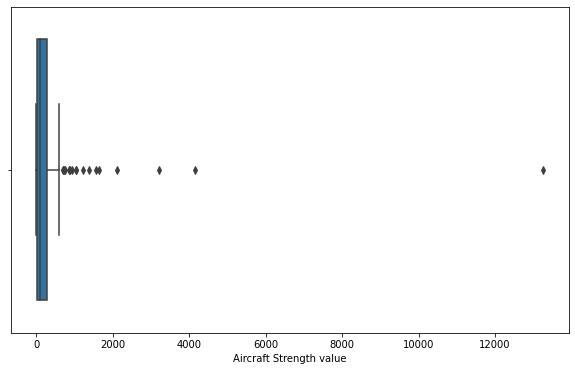

In [45]:
sns.boxplot(df["Aircraft Strength value"])

<AxesSubplot:xlabel='Aircraft Carrier Fleet Strength value'>

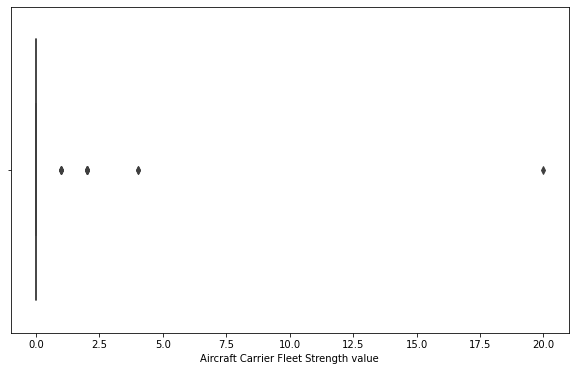

In [46]:
sns.boxplot(df["Aircraft Carrier Fleet Strength value"])

In [47]:
df["Aircraft Strength value"]


Afghanistan    260.0
Albania         19.0
Algeria        551.0
Angola         295.0
Argentina      227.0
               ...  
Venezuela      260.0
Vietnam        293.0
Yemen          169.0
Zambia         108.0
Zimbabwe        90.0
Name: Aircraft Strength value, Length: 138, dtype: float64

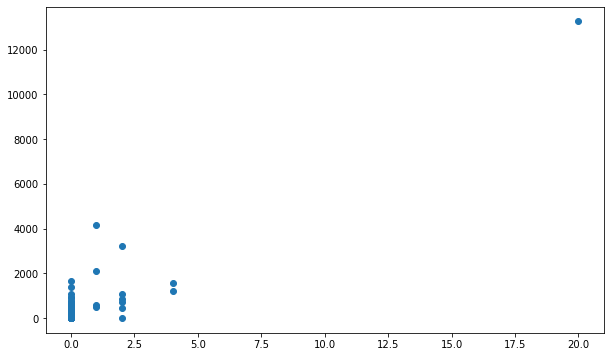

In [48]:
plt.scatter(df["Aircraft Carrier Fleet Strength value"],df["Aircraft Strength value"]);

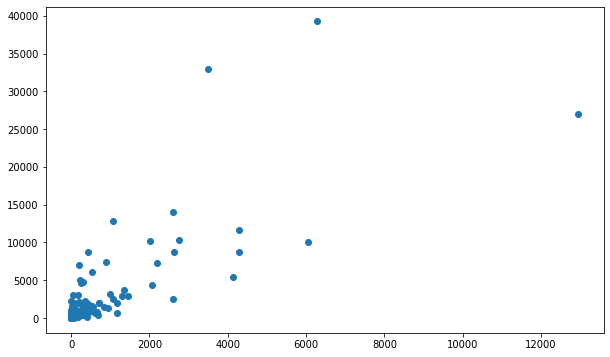

In [49]:
plt.scatter(df["Tank Strength value"],df["AFV/APC Strength value"])

<AxesSubplot:xlabel='Tank Strength value'>

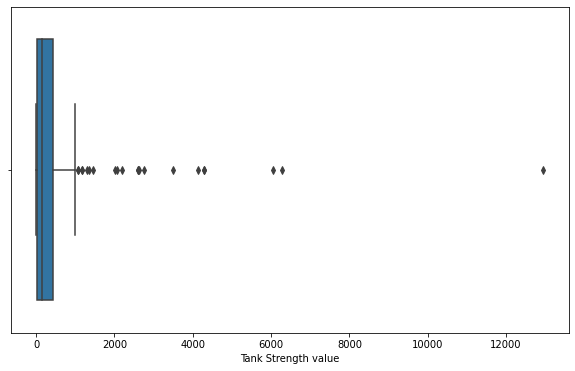

In [50]:
sns.boxplot(df["Tank Strength value"])

In [51]:
max(df["Tank Strength value"])

12950.0

In [52]:
df["Tank Strength value"].sort_values(ascending=False)


Russia           12950.0
United States     6289.0
North Korea       6045.0
Egypt             4295.0
India             4292.0
                  ...   
Nepal                0.0
New Zealand          0.0
Niger                0.0
Panama               0.0
Afghanistan          0.0
Name: Tank Strength value, Length: 138, dtype: float64

<AxesSubplot:xlabel='Tank Strength value'>

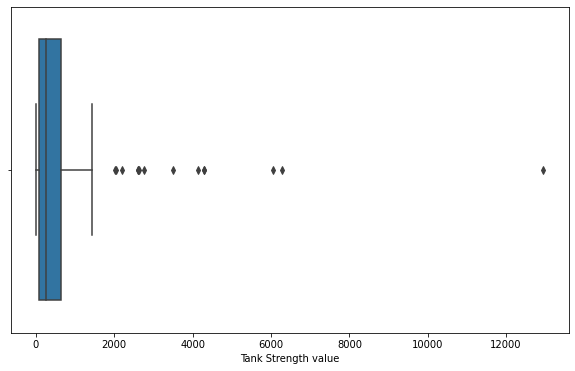

In [53]:
sns.boxplot(df[df["Tank Strength value"]>0]["Tank Strength value"])

In [54]:
df[df["Tank Strength value"] == 12950.0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
,,,,,,,,,,,,,,,,,,,,,
Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,27038.0,...,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,142122776.0,17098242.0,37653.0,102000.0,22408.0


## Decriptive statistics

In [55]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,...,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,4874.456522,5464.130435,3705.688406
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,...,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,18603.336310,16494.534600,3764.917170
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000,0.000000,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,...,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,49.750000,0.000000,1401.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,...,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,793.000000,875.000000,2564.500000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,...,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,2746.500000,3050.000000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,...,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,22457.000000


# Data Preprocessing

In [56]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0


In [72]:
from sklearn.preprocessing import MaxAbsScaler

In [73]:
X = df.copy()

In [74]:
transformer = MaxAbsScaler().fit(X)

In [75]:
X_Scaled = transformer.transform(X)

In [76]:
X_Scaled

array([[0.13221743, 0.01960193, 0.        , ..., 0.        , 0.01090909,
        0.26659839],
       [0.22754497, 0.00143245, 0.        , ..., 0.00179137, 0.00037273,
        0.03076992],
       [0.04581977, 0.04154101, 0.04940048, ..., 0.00493864, 0.        ,
        0.29986196],
       ...,
       [0.12206804, 0.01274125, 0.03693046, ..., 0.00943191, 0.        ,
        0.0712918 ],
       [0.16191816, 0.00814234, 0.00863309, ..., 0.        , 0.02045455,
        0.26909204],
       [0.17286415, 0.00678528, 0.00479616, ..., 0.        , 0.        ,
        0.1437859 ]])

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [62]:
#pip install --user pyclustertend

In [63]:
#pip install pyclustertend --user

In [64]:
#from pyclustertend import hopkins

In [65]:
#hopkins(X, X.shape[0])

## Clustering with K-means

In [77]:
from sklearn.cluster import KMeans

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [80]:
ssd = [] # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_Scaled)
    ssd.append(model.inertia_)
# INERTIA, sıkı sıkıya kümelenmeyi gösteriyor, küçük olması istenir,merkez(centroid) etrafında kümelenme.
# Düşük olması küme içi iyi kümelenmeyi(yoğunlaşmayı) gösterir.

In [81]:
ssd

[33.98966231047832,
 27.963182015243376,
 22.777047218875076,
 20.17269282142828,
 17.401065732329045,
 15.32354587517143,
 13.32064598595546,
 11.90754782311048]

Text(0.5, 1.0, 'elbow method')

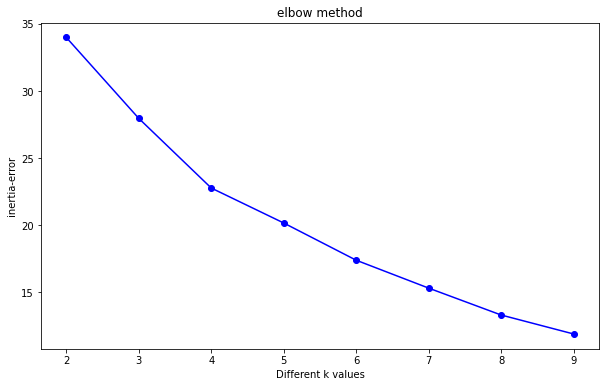

In [82]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

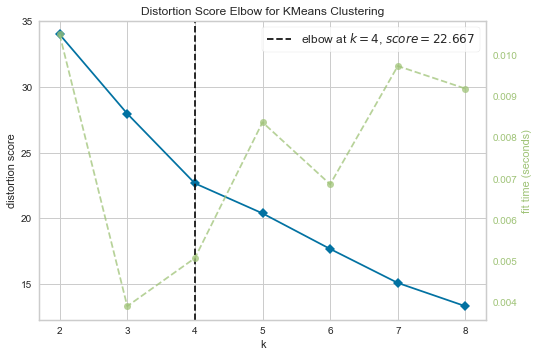

In [83]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_Scaled)  
visualizer.show();

In [84]:
from sklearn.metrics import silhouette_score
# modelimizin başarısı ölçüyoruz, hem yoğun gruplaşma  hem de gruplar arası uzaklığı ölçerek
# kümelemenin başarılı mi değil mi?
# 1 e ne kadar yakınsa o kadar iyi

In [86]:
silhouette_score(X_Scaled, model_.labels_)

0.3033033610117964

In [89]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_Scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_Scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8404882559999094
For n_clusters=3, the silhouette score is 0.8273512678659799
For n_clusters=4, the silhouette score is 0.582767025567723
For n_clusters=5, the silhouette score is 0.367065848679017
For n_clusters=6, the silhouette score is 0.5671995264289497
For n_clusters=7, the silhouette score is 0.2989299222769233
For n_clusters=8, the silhouette score is 0.31097178902411754


### Model Building and label visualisation

In [90]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [91]:
model.inertia_

1.5683101158001778e+25

In [93]:
model.labels_

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [94]:
df["cluster"] = model.labels_

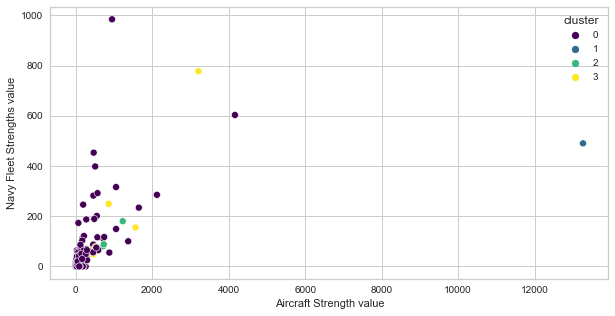

In [96]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Aircraft Strength value"], 
                df["Navy Fleet Strengths value"], hue= df.cluster,palette= "viridis");

In [99]:
import plotly.express as px

In [100]:
fig = px.scatter_3d(x=df["Aircraft Strength value"],
                   y=df["defense spending budget value"],
                   z=df["External Debt value"],
                   color=df.cluster,
                   labels = {"x": "Aircraft Strength value",
                             "y": "defense spending budget value",
                             "z": "External Debt value"},
                   hover_name=df.index)

fig.show()

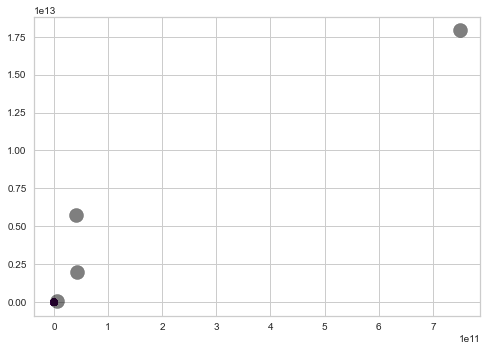

In [104]:
centroids = model.cluster_centers_

plt.scatter(X_Scaled[:,18], X_Scaled[:,19], c = df.cluster, s = 50, cmap = "viridis")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

TypeError: annotate() missing 1 required positional argument: 'text'

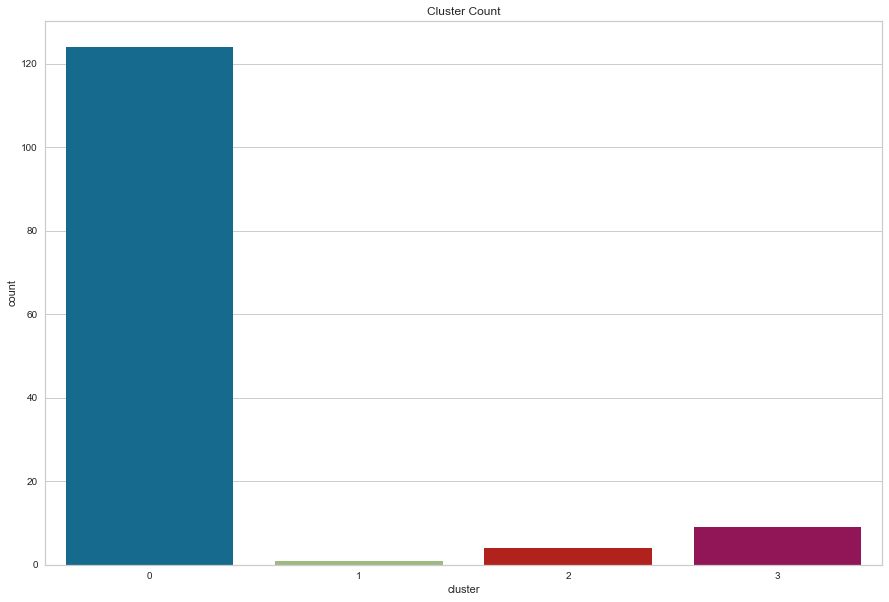

In [107]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();
plt.show();

In [110]:
df[df["cluster"] == 0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.0,7100.0,5267.0,0
Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.0,17702.0,4616.0,0
Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.0,0.0,1601.0,0


In [112]:
df[df["cluster"] == 1]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
,,,,,,,,,,,,,,,,,,,,,
United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,...,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048.0,1


In [111]:
df[df["cluster"] == 2]


,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
,,,,,,,,,,,,,,,,,,,,,
France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,6028.0,...,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,643801.0,4853.0,8501.0,4072.0,2
Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,4583.0,...,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,357022.0,2389.0,7467.0,3694.0,2
Netherlands,0.5919,168.0,61.0,1.0,4.0,27.0,75.0,28.0,18.0,1546.0,...,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,41543.0,451.0,6237.0,1053.0,2
United Kingdom,0.1717,733.0,133.0,15.0,44.0,241.0,312.0,49.0,227.0,5000.0,...,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,243610.0,12429.0,3200.0,443.0,2


In [113]:
df[df["cluster"] == 3]


,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
,,,,,,,,,,,,,,,,,,,,,
Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,...,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760.0,2000.0,0.0,3
Belgium,1.0499,148.0,43.0,0.0,12.0,64.0,29.0,0.0,0.0,984.0,...,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,30528.0,67.0,2043.0,1297.0,3
Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,...,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,9984670.0,202080.0,636.0,8893.0,3
China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,33000.0,...,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,9596961.0,14500.0,110000.0,22457.0,3
Ireland,1.9481,19.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,124.0,...,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,70273.0,1448.0,956.0,443.0,3
Italy,0.2111,860.0,99.0,110.0,38.0,185.0,439.0,59.0,200.0,6947.0,...,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,301340.0,7600.0,2400.0,1836.0,3
Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,...,3841.0,4000000.0,4.412000e+07,53873803.0,1.261682e+08,377915.0,29751.0,1770.0,0.0,3
Spain,0.3388,512.0,137.0,12.0,46.0,162.0,162.0,19.0,327.0,2023.0,...,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,505370.0,4964.0,1000.0,1953.0,3
Switzerland,0.5259,169.0,54.0,0.0,18.0,54.0,42.0,0.0,326.0,1338.0,...,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,41277.0,0.0,1299.0,1770.0,3


### Evaluate 

In [114]:
from sklearn.metrics import silhouette_score


In [115]:
print(f'Silhouette Score(n=4): {silhouette_score(X_Scaled, df.cluster)}') # towards to 1 means, data good clustered by model


Silhouette Score(n=4): 0.14785939449736402


In [116]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_Scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_Scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8404882559999094
For n_clusters=3, the silhouette score is 0.8273512678659799
For n_clusters=4, the silhouette score is 0.582500489064595
For n_clusters=5, the silhouette score is 0.43941388113781876
For n_clusters=6, the silhouette score is 0.4985579751243746
For n_clusters=7, the silhouette score is 0.2992397357170201
For n_clusters=8, the silhouette score is 0.3033033610117964


In [117]:
den = pd.DataFrame(X_Scaled,columns=df.drop(["cluster"],axis=1).columns)
den["cluster"] = df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster
0
Military Strength Power Index
Aircraft Strength value
Fighter/Interceptor Strength value
Attack Aircraft Strength value
Transport Aircraft Fleet Strength value
Trainer Aircraft Fleet value
Helicopter Fleet Strength value
Attack Helicopter Fleet Strength value
Tank Strength value


In [118]:
fig= px.line(clus_pred)
fig.show()

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 